# Proceso de preparación de los datos

En este notebook se realizará el proceso completo de preparación de datos para así poder utilizar este set de datos en un posterior analisis de datos. A este proceso se le conoce con el nombre en ingles: **`Data Wrangling`**.

## Bibliotecas necesarias
En primer lugar debemos importar las bibliotecas de Python Pandas y Numpy. Utlizaremos las estructuras de datos y operaciones que nos ofrecen estas librerías para preparar nuestros datos.

In [93]:
import pandas as pd
import numpy as np

## Buscar ubicación y leer la base de datos en formato ".csv"
Leemos el conjunto de datos presentes en el archivo .csv y lo almacenamos en una estructura de datos DataFrame.

In [94]:
path = "./newview_202204281140.csv"
df = pd.read_csv(path, header = 0)

## Revisar encabezados
Revisamos si los datos de entrada poseen encabezado o no. De no ser así, debemos corregir esta situación agregandoles encabezados que nos permitan identificar los atributos del conjunto de datos.


In [95]:
df.head()

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,co,no2,c2h5ch,idnodo
0,3909814,2022-04-28 15:40:00,0.88,21.0,708.0,0.0,-1.0,27.3,50.0,39.0,1.56,55.0,103.0,fdba37
1,3909794,2022-04-28 15:38:00,0.88,21.0,708.0,0.0,?,27.3,49.,40.0,1.62,57.0,104.0,fdba37
2,3909774,2022-04-28 15:37:00,0.88,21.0,708.0,NaN,4.3,27.3,49.6,40.0,1.57,56.0,104.0,fdba37
3,3909754,2022-04-28 15:36:00,0.88,21.0,?,2.4,3.0,?,49.6,40.0,1.57,55.0,104.0,fdba37
4,3909734,2022-04-28 15:35:00,NaN,?,708.0,2.6,3.7,27.3,49.4,40.0,1.56,56.0,104.0,fdba37


En caso de que los datos no posean encabezado, debemos crear una lista con todos los nombres que le vamos a asignar a los encabezados y los reemplazamos. Luego verificamos el cambio.

In [96]:
encabezados = ["id","timestamp","pmv","ppd","co2","pm25","pm10", "temp","hr","voc","co","no2","c2h5ch","idnodo"]
df.columns = encabezados
df.head()

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,co,no2,c2h5ch,idnodo
0,3909814,2022-04-28 15:40:00,0.88,21.0,708.0,0.0,-1.0,27.3,50.0,39.0,1.56,55.0,103.0,fdba37
1,3909794,2022-04-28 15:38:00,0.88,21.0,708.0,0.0,?,27.3,49.,40.0,1.62,57.0,104.0,fdba37
2,3909774,2022-04-28 15:37:00,0.88,21.0,708.0,NaN,4.3,27.3,49.6,40.0,1.57,56.0,104.0,fdba37
3,3909754,2022-04-28 15:36:00,0.88,21.0,?,2.4,3.0,?,49.6,40.0,1.57,55.0,104.0,fdba37
4,3909734,2022-04-28 15:35:00,NaN,?,708.0,2.6,3.7,27.3,49.4,40.0,1.56,56.0,104.0,fdba37


## Analisis básico
Realizamos un análisis básico de los datos para ver el estado de estos con los métodos .describe() e .info().

### Descripción
Al utilizar el método .describe() se mostrará un resumen estadístico descriptivo que incluye: media, meadiana, máx, mín, desviación estandar (std), percentil 25%, percentil 50%, percentil 75% y conteos para cada columna en particular de los datos.

**Podemos ver que algunos valores se muestran como **NaN**, esto es debido a que la función regresa los valores de estas estadísticas solo para las columnas numéricas.*

In [97]:
df.describe(include = "all")

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,co,no2,c2h5ch,idnodo
count,6.000000e+01,60,55,58,59,51,57,58,58,55,57,59,60,59
unique,NaN,60,11,6,3,28,43,5,23,7,25,14,4,1
top,NaN,2022-04-28 15:40:00,0.88,21.0,708.0,0.0,-1.0,27.3,49.8,40.0,1.57,55.0,103.0,fdba37
freq,NaN,1,22,32,56,7,7,30,8,33,5,10,38,59
mean,3.909224e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.492850e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.908634e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.908929e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.909224e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.909519e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Información
El método info() imprime información sobre el DataFrame con los `indices de columnas`, `número de valores no-nulos`, tipos de datos de cada columna (`dtype`) y `uso de la memoria`.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         60 non-null     int64 
 1   timestamp  60 non-null     object
 2   pmv        55 non-null     object
 3   ppd        58 non-null     object
 4   co2        59 non-null     object
 5   pm25       51 non-null     object
 6   pm10       57 non-null     object
 7   temp       58 non-null     object
 8   hr         58 non-null     object
 9   voc        55 non-null     object
 10  co         57 non-null     object
 11  no2        59 non-null     object
 12  c2h5ch     60 non-null     object
 13  idnodo     59 non-null     object
dtypes: int64(1), object(13)
memory usage: 6.7+ KB


## Identificar y manipular valores faltantes

### Verificar si hay datos nulos
Utilizando la función .isnull() nos retorna una tabla donde si hay un valor en blanco devuelve `"True"` en el caso contrario devuelve `"False"`.

In [99]:
Datos_nulos = df.isnull()
Datos_nulos.head(10)

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,co,no2,c2h5ch,idnodo
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,True,False,False,False,True,False,False
7,False,False,True,False,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,True,False,False,False,False,False


### Identificar valores incongruentes
Identificar valores extraños como por ejemplo: `"?"`.

In [100]:
df.head(10)

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,co,no2,c2h5ch,idnodo
0,3909814,2022-04-28 15:40:00,0.88,21.0,708.0,0.0,-1.0,27.3,50.0,39.0,1.56,55.0,103.0,fdba37
1,3909794,2022-04-28 15:38:00,0.88,21.0,708.0,0.0,?,27.3,49.,40.0,1.62,57.0,104.0,fdba37
2,3909774,2022-04-28 15:37:00,0.88,21.0,708.0,NaN,4.3,27.3,49.6,40.0,1.57,56.0,104.0,fdba37
3,3909754,2022-04-28 15:36:00,0.88,21.0,?,2.4,3.0,?,49.6,40.0,1.57,55.0,104.0,fdba37
4,3909734,2022-04-28 15:35:00,NaN,?,708.0,2.6,3.7,27.3,49.4,40.0,1.56,56.0,104.0,fdba37
5,3909714,2022-04-28 15:34:00,0.88,21.0,708.0,NaN,4.1,27.3,49.5,40.0,NaN,56.0,104.0,fdba37
6,3909694,2022-04-28 15:33:00,0.88,21.0,708.0,2.7,3.6,NaN,?,40.0,1.56,NaN,103.0,fdba37
7,3909674,2022-04-28 15:32:00,NaN,21.0,708.0,0.0,NaN,27.3,49.8,?,1.58,55.0,103.0,fdba37
8,3909654,2022-04-28 15:31:00,0.88,21.0,708.0,NaN,4.0,27.3,49.8,40.0,1.6,55.0,104.0,fdba37
9,3909634,2022-04-28 15:30:00,0.88,21.0,708.0,2.9,5.2,27.3,NaN,40.0,1.59,55.0,103.0,fdba37


### Reemplazar valores incongruentes por "NaN"
Siguiendo lo identificado anteriormente, reemplazamos los valores `"?"` por `"NaN"` que es nulo. Verificamos que se reemplazaron los valores.

In [101]:
df.replace("?", np.nan, inplace = True)
df.head(10)

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,co,no2,c2h5ch,idnodo
0,3909814,2022-04-28 15:40:00,0.88,21.0,708.0,0.0,-1.0,27.3,50.0,39.0,1.56,55.0,103.0,fdba37
1,3909794,2022-04-28 15:38:00,0.88,21.0,708.0,0.0,NaN,27.3,49.,40.0,1.62,57.0,104.0,fdba37
2,3909774,2022-04-28 15:37:00,0.88,21.0,708.0,NaN,4.3,27.3,49.6,40.0,1.57,56.0,104.0,fdba37
3,3909754,2022-04-28 15:36:00,0.88,21.0,NaN,2.4,3.0,NaN,49.6,40.0,1.57,55.0,104.0,fdba37
4,3909734,2022-04-28 15:35:00,NaN,NaN,708.0,2.6,3.7,27.3,49.4,40.0,1.56,56.0,104.0,fdba37
5,3909714,2022-04-28 15:34:00,0.88,21.0,708.0,NaN,4.1,27.3,49.5,40.0,NaN,56.0,104.0,fdba37
6,3909694,2022-04-28 15:33:00,0.88,21.0,708.0,2.7,3.6,NaN,NaN,40.0,1.56,NaN,103.0,fdba37
7,3909674,2022-04-28 15:32:00,NaN,21.0,708.0,0.0,NaN,27.3,49.8,NaN,1.58,55.0,103.0,fdba37
8,3909654,2022-04-28 15:31:00,0.88,21.0,708.0,NaN,4.0,27.3,49.8,40.0,1.6,55.0,104.0,fdba37
9,3909634,2022-04-28 15:30:00,0.88,21.0,708.0,2.9,5.2,27.3,NaN,40.0,1.59,55.0,103.0,fdba37


### Verificar si los datos cambiaron correctamente
Si hay un valor en blanco devuelve `"True"` en el caso contrario devuelve `"False"`.

In [102]:
Datos_nulos = df.isnull()
Datos_nulos.head(10)

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,co,no2,c2h5ch,idnodo
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,True,True,False,False,True,False,False
7,False,False,True,False,False,False,True,False,False,True,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,True,False,False,False,False,False


## Corregir el formato de los datos
Del análisis básico pudimos ver que la mayoría de columnas se encuentran con tipo 'object', pero estas columnas deberían ser de tipo númerico. Entonces ocupando la función `"pd.to_numeric()"` realizamos esta corrección para las columnas que deberían ser de tipo númerico. Además agregamos el parametro `"errors='coerce'"` para dejar nulos `(NaN)`  aquellos datos que tienen error.

In [103]:
df[["pmv","ppd","co2","pm25","pm10", "temp","hr","voc","co","no2","c2h5ch"]] = df[["pmv","ppd","co2","pm25","pm10", "temp","hr","voc","co","no2","c2h5ch"]].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         60 non-null     int64  
 1   timestamp  60 non-null     object 
 2   pmv        53 non-null     float64
 3   ppd        55 non-null     float64
 4   co2        57 non-null     float64
 5   pm25       50 non-null     float64
 6   pm10       56 non-null     float64
 7   temp       56 non-null     float64
 8   hr         56 non-null     float64
 9   voc        52 non-null     float64
 10  co         56 non-null     float64
 11  no2        56 non-null     float64
 12  c2h5ch     59 non-null     float64
 13  idnodo     59 non-null     object 
dtypes: float64(11), int64(1), object(2)
memory usage: 6.7+ KB


## Calcular el valor promedio de las columnas
 - "pmv"
 - "ppd"
 - "co2"
 - "pm25"
 - "pm10"
 - "temp"
 - "hr"
 - "voc"
 - "co"
 - "no2" 


- Columna "pmv"

In [104]:
pmv_pro = round(df['pmv'].mean(axis=0),2)
print("Promedio de pmv:", pmv_pro)

Promedio de pmv: 0.87


- Reemplazar "NaN" con el valor promedio en la columna "pmv"


In [155]:
df['pmv'].replace(np.nan, pmv_pro, inplace=True)

- Columna "ppd"

In [156]:
ppd_pro = round(df['ppd'].mean(axis=0),1)
print("Promedio de ppd:", ppd_pro)

Promedio de ppd: 20.8


- Reemplazar "NaN" con el valor promedio en la columna "ppd"


In [157]:
df['ppd'].replace(np.nan, ppd_pro, inplace=True)

- Columna "co2"

In [158]:
co2_pro = round(df['co2'].mean(axis=0),1)
print("Promedio de co2:", co2_pro)

Promedio de co2: 1.0


- Reemplazar "NaN" con el valor promedio en la columna "co2"


In [159]:
df['co2'].replace(np.nan, co2_pro, inplace=True)

- Columna "pm25"

In [160]:
pm25_pro = round(df['pm25'].mean(axis=0),1)
print("Promedio de pm25:", pm25_pro)

Promedio de pm25: 3.4


- Reemplazar "NaN" con el valor promedio en la columna "pm25"


In [111]:
df['pm25'].replace(np.nan, pm25_pro, inplace=True)

- Columna "pm10"

In [112]:
pm10_pro = round(df['pm10'].mean(axis=0),1)
print("Promedio de pm10:", pm10_pro)

Promedio de pm10: 6.9


- Reemplazar "NaN" con el valor promedio en la columna "pm10"


In [113]:
df['pm10'].replace(np.nan, pm10_pro, inplace=True)

- Columna "temp"

In [114]:
temp_pro = round(df['temp'].mean(axis=0),1)
print("Promedio de temp:", temp_pro)

Promedio de temp: 27.6


- Reemplazar "NaN" con el valor promedio en la columna "temp"


In [115]:
df['temp'].replace(np.nan, temp_pro, inplace=True)

- Columna "hr"

In [116]:
hr_pro = round(df['hr'].mean(axis=0),1)
print("Promedio de hr:", hr_pro)

Promedio de hr: 50.2


- Reemplazar "NaN" con el valor promedio en la columna "hr"


In [117]:
df['hr'].replace(np.nan, hr_pro, inplace=True)

- Columna "voc"

In [118]:
voc_pro = df['voc'].mean(axis=0)
print("Promedio de voc:", voc_pro)

Promedio de voc: 39.85961538461538


- Reemplazar "NaN" con el valor promedio en la columna "voc"


In [119]:
df['voc'].replace(np.nan, voc_pro, inplace=True)

- Columna "co"

In [120]:
co_pro = df['co'].mean(axis=0)
print("Promedio de co:", co_pro)

Promedio de co: 2.6232142857142855


- Reemplazar "NaN" con el valor promedio en la columna "co"


In [121]:
df['co'].replace(np.nan, co_pro, inplace=True)

- Columna "no2"

In [122]:
no2_pro = df['no2'].mean(axis=0)
print("Promedio de no2:", no2_pro)

Promedio de no2: 56.30357142857143


- Reemplazar "NaN" con el valor promedio en la columna "no2"


In [123]:
df['no2'].replace(np.nan, no2_pro, inplace=True)

- Columna "c2h5ch"

In [124]:
c2h5ch_pro = round(df['c2h5ch'].mean(axis=0),1)
print("Promedio de c2h5ch:", c2h5ch_pro)

Promedio de c2h5ch: 103.1


- Reemplazar "NaN" con el valor promedio en la columna "c2h5ch"


In [125]:
df['c2h5ch'].replace(np.nan, c2h5ch_pro, inplace=True)

## Verificar si se cambió correctamente el tipo de dato

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         60 non-null     int64  
 1   timestamp  60 non-null     object 
 2   pmv        60 non-null     float64
 3   ppd        60 non-null     float64
 4   co2        60 non-null     float64
 5   pm25       60 non-null     float64
 6   pm10       60 non-null     float64
 7   temp       60 non-null     float64
 8   hr         60 non-null     float64
 9   voc        60 non-null     float64
 10  co         60 non-null     float64
 11  no2        60 non-null     float64
 12  c2h5ch     60 non-null     float64
 13  idnodo     59 non-null     object 
dtypes: float64(11), int64(1), object(2)
memory usage: 6.7+ KB


## Estandarizar los datos de entrada
Ya que los datos pueden estar en diferentes formatos, la estandarización de datos nos ayuda a transformarlos a otro formato más adecuado. En este caso tenemos la temperatura en grados Celsius (°C), si en nuestro país se manejara la unidad de temperatura Kelvin (K), transformar los datos para la columna `temp` a grados Kelvin sería lo adecuado.

A continuación se realizará el ejemplo de pasar los datos de °C a K.

In [161]:
df['temp(K)'] = df['temp'] + 273.15

# Verifica la transformación de los datos 
df.head(20)

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,...,no2,c2h5ch,idnodo,temp(K),pm25-clasificacion,disconformidad-19%,disconformidad-20%,20.8,disconformidad-21%,disconformidad-22%
0,3909814,2022-04-28 15:40:00,0.88,21.0,1.000000,0.0,-1.0,27.3,50.0,0.906977,...,0.533981,0.990385,fdba37,300.45,Bajo,0,0,0,1,0
1,3909794,2022-04-28 15:38:00,0.88,21.0,1.000000,0.0,6.9,27.3,49.0,0.930233,...,0.553398,1.000000,fdba37,300.45,Bajo,0,0,0,1,0
2,3909774,2022-04-28 15:37:00,0.88,21.0,1.000000,3.4,4.3,27.3,49.6,0.930233,...,0.543689,1.000000,fdba37,300.45,Mediano,0,0,0,1,0
3,3909754,2022-04-28 15:36:00,0.88,21.0,0.982627,2.4,3.0,27.6,49.6,0.930233,...,0.533981,1.000000,fdba37,300.75,Bajo,0,0,0,1,0
4,3909734,2022-04-28 15:35:00,0.87,20.8,1.000000,2.6,3.7,27.3,49.4,0.930233,...,0.543689,1.000000,fdba37,300.45,Bajo,0,0,1,0,0
5,3909714,2022-04-28 15:34:00,0.88,21.0,1.000000,3.4,4.1,27.3,49.5,0.930233,...,0.543689,1.000000,fdba37,300.45,Mediano,0,0,0,1,0
6,3909694,2022-04-28 15:33:00,0.88,21.0,1.000000,2.7,3.6,27.6,50.2,0.930233,...,0.546637,0.990385,fdba37,300.75,Bajo,0,0,0,1,0
7,3909674,2022-04-28 15:32:00,0.87,21.0,1.000000,0.0,6.9,27.3,49.8,0.926968,...,0.533981,0.990385,fdba37,300.45,Bajo,0,0,0,1,0
8,3909654,2022-04-28 15:31:00,0.88,21.0,1.000000,3.4,4.0,27.3,49.8,0.930233,...,0.533981,1.000000,fdba37,300.45,Mediano,0,0,0,1,0
9,3909634,2022-04-28 15:30:00,0.88,21.0,1.000000,2.9,5.2,27.3,50.2,0.930233,...,0.533981,0.990385,fdba37,300.45,Bajo,0,0,0,1,0


Se agregó una columna más para tener la temperatura en grados Kelvin. Adicionalmente se podría eliminar la columna `temp` con los datos en °C.

- Se elimina la columna `"temp"`, ya que se estandarizó y se agregó la columna `"temp(K)"`

In [162]:
#df.drop('temp', axis = 1, inplace=True)
df.head()

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,...,no2,c2h5ch,idnodo,temp(K),pm25-clasificacion,disconformidad-19%,disconformidad-20%,20.8,disconformidad-21%,disconformidad-22%
0,3909814,2022-04-28 15:40:00,0.88,21.0,1.000000,0.0,-1.0,27.3,50.0,0.906977,...,0.533981,0.990385,fdba37,300.45,Bajo,0,0,0,1,0
1,3909794,2022-04-28 15:38:00,0.88,21.0,1.000000,0.0,6.9,27.3,49.0,0.930233,...,0.553398,1.000000,fdba37,300.45,Bajo,0,0,0,1,0
2,3909774,2022-04-28 15:37:00,0.88,21.0,1.000000,3.4,4.3,27.3,49.6,0.930233,...,0.543689,1.000000,fdba37,300.45,Mediano,0,0,0,1,0
3,3909754,2022-04-28 15:36:00,0.88,21.0,0.982627,2.4,3.0,27.6,49.6,0.930233,...,0.533981,1.000000,fdba37,300.75,Bajo,0,0,0,1,0
4,3909734,2022-04-28 15:35:00,0.87,20.8,1.000000,2.6,3.7,27.3,49.4,0.930233,...,0.543689,1.000000,fdba37,300.45,Bajo,0,0,1,0,0


## Normalizar los datos de entrada
A continuación se muestra el proceso para realizar 3 tipos de normalización al set de datos; Normalización Media y Normalización Min-Max.

### Normalización Max
Utilizaremos la normalización para transformar los valores de varias variables del DataFrame a un rango similar. Esta normalización que aplicaremos se hace dividiendo por el max() para todos los elementos del Dataframe.

In [129]:
#Definimos una función que realiza la normalización, recibe como parametro de entrada el DataFrame a normalizar.
def funNorm(df_input):
    return df_input.apply(lambda x: (x)/ x.max(), axis=0)

df_norm = funNorm(df[["co2","voc","co","no2","c2h5ch"]])

Comprobamos el resultado de la normalización realizada graficando los valores de la columna `no2` antes y despues de la normalización.

<AxesSubplot:title={'center':'NO2 sin normalizar'}>

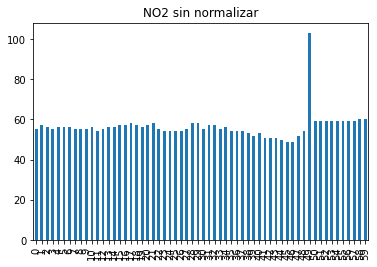

In [130]:
%matplotlib inline
df['no2'].plot(title='NO2 sin normalizar',kind='bar')

<AxesSubplot:title={'center':'NO2 con normalización max'}>

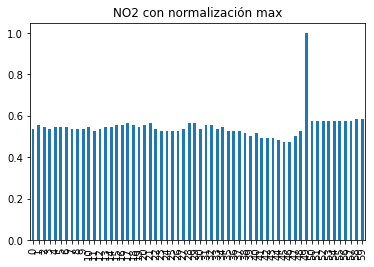

In [131]:
df_norm['no2'].plot(title='NO2 con normalización max',kind='bar')

### Normalización Media
Utilizaremos la normalización media que es una de las formas más fáciles de normalizar los Dataframes de rangos variados. Esta normalización se hace restando la media y dividiendo por la desviación estándar para todos los elementos del Dataframe.

In [132]:
#Definimos una función que realiza la normalización media, recibe como parametro de entrada el DataFrame a normalizar.
def funNormMed(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_normMed = funNormMed(df[["co2","voc","co","no2","c2h5ch"]])

Comprobamos el resultado de la normalización realizada graficando los valores de la columna `no2` antes y despues de la normalización.

<AxesSubplot:title={'center':'NO2 sin normalizar'}>

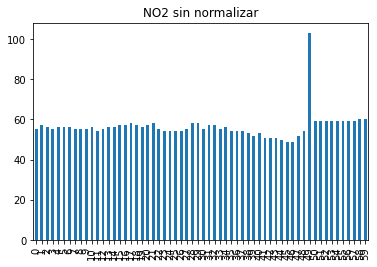

In [133]:
%matplotlib inline
df['no2'].plot(title='NO2 sin normalizar',kind='bar')

<AxesSubplot:title={'center':'NO2 con normalización media'}>

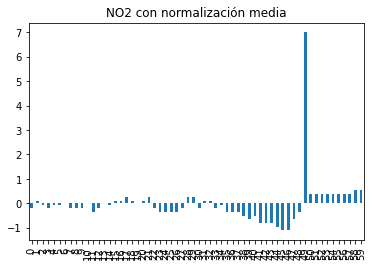

In [134]:
df_normMed['no2'].plot(title='NO2 con normalización media',kind='bar')

### Normalización Min-Max
Por otro lado tenemos la Normalización Min-Max que es uno de los métodos ampliamente utilizados para la normalización. El resultado de esta normalización resta el valor mínimo de Dataframe y lo divide por la diferencia entre el valor más alto y el más bajo de la columna correspondiente.

In [135]:
#Definimos una función que realiza la normalización min-max, recibe como parametro de entrada el DataFrame a normalizar.
def funNormMinMax(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

df_normMinMax = funNormMinMax(df[["co2","voc","co","no2","c2h5ch"]])

Comprobamos el resultado de la normalización realizada graficando los valores de la columna `no2` antes y despues de la normalización.

<AxesSubplot:title={'center':'NO2 sin normalizar'}>

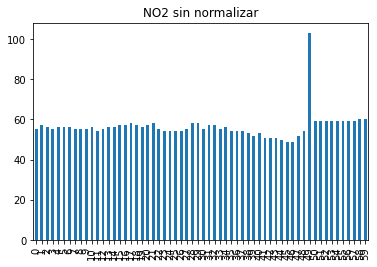

In [136]:
df['no2'].plot(title='NO2 sin normalizar',kind='bar')

<AxesSubplot:title={'center':'NO2 con normalización min-max'}>

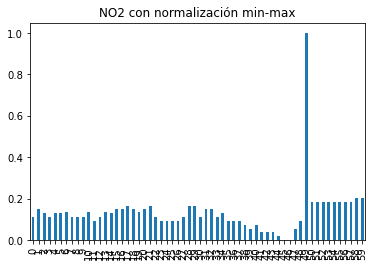

In [137]:
df_normMinMax['no2'].plot(title='NO2 con normalización min-max',kind='bar')

### Normalizar Datos
Por ultimo aplicaremos la normalización a las variables `"co2" "voc" "co" "no2" "c2h5ch"` para transformar sus valores a un rango similar entre ellas y además todas estas variables están en la misma unidad de medida `"ppm"`.

En este caso se eligió utilizar el primer método de normalización ya que al ver los resultados de la prueba que se hizo para cada uno de ellos, pudimos ver que el gráfico generado tras aplicar este método es el que presenta más similitud con el gráfico de la variable original.

In [138]:
df[["co2","voc","co","no2","c2h5ch"]] = funNorm(df[["co2","voc","co","no2","c2h5ch"]])
df.head()

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,co,no2,c2h5ch,idnodo,temp(K)
0,3909814,2022-04-28 15:40:00,0.88,21.0,1.000000,0.0,-1.0,27.3,50.0,0.906977,0.027368,0.533981,0.990385,fdba37,300.45
1,3909794,2022-04-28 15:38:00,0.88,21.0,1.000000,0.0,6.9,27.3,49.0,0.930233,0.028421,0.553398,1.000000,fdba37,300.45
2,3909774,2022-04-28 15:37:00,0.88,21.0,1.000000,3.4,4.3,27.3,49.6,0.930233,0.027544,0.543689,1.000000,fdba37,300.45
3,3909754,2022-04-28 15:36:00,0.88,21.0,0.982627,2.4,3.0,27.6,49.6,0.930233,0.027544,0.533981,1.000000,fdba37,300.75
4,3909734,2022-04-28 15:35:00,0.87,20.8,1.000000,2.6,3.7,27.3,49.4,0.930233,0.027368,0.543689,1.000000,fdba37,300.45


## Agrupar datos
Podemos transformar variables númericas continuas a intervalos discretos para dar la posibilidad de realizar un análisis de grupo con estas variables.

En este caso agruparemos la variable `pm25` y el primer paso es graficar un histograma de esta variable para ver como se distribuyen sus valores y así ver en qué intervalos la podemos agrupar.

Text(0.5, 1.0, 'Material Particulado Fino (μg/m³)')

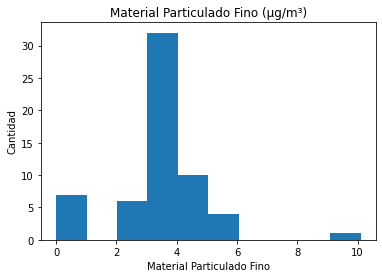

In [139]:
%matplotlib inline
import matplotlib as plt
#from matplotlib import pyplot

plt.pyplot.hist(df["pm25"])

# setear las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("Material Particulado Fino")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Material Particulado Fino (μg/m³)")

Luego se define el valor máximo y mínimo utilizando las divisiones anteriormente calculadas 

In [140]:
contenedores = np.linspace(min(df["pm25"]), max(df["pm25"]), 4)
contenedores

array([ 0.        ,  3.36666667,  6.73333333, 10.1       ])

Creamos la lista `nombres_de_grupos` donde debemos definir los grupos que vamos a utilizar:


In [141]:
nombres_de_grupo = ['Bajo', 'Mediano', 'Alto']

Aplicamos la función `cut` que sirve para separar los elementos de una matriz en diferentes contenedores y así definir qué valores de `df['pm25']` pertenecen a cada grupo.


In [142]:
df['pm25-clasificacion'] = pd.cut(df['pm25'], contenedores, labels=nombres_de_grupo, include_lowest=True )
df[['pm25','pm25-clasificacion']].head(20)

,pm25,pm25-clasificacion
0,0.0,Bajo
1,0.0,Bajo
2,3.4,Mediano
3,2.4,Bajo
4,2.6,Bajo
5,3.4,Mediano
6,2.7,Bajo
7,0.0,Bajo
8,3.4,Mediano
9,2.9,Bajo


Para ver el número de `pm25` que hay en cada grupo se utiliza el método `.values_counts()`.


In [143]:
df["pm25-clasificacion"].value_counts()

Mediano    41
Bajo       18
Alto        1
Name: pm25-clasificacion, dtype: int64

Graficamos la distribución de cada grupo.

Text(0.5, 1.0, 'Contenedores pm25')

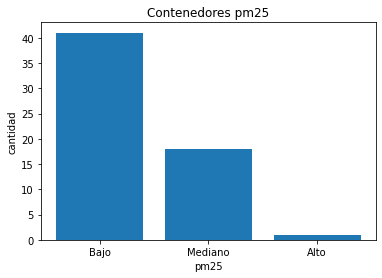

In [144]:
plt.pyplot.bar(nombres_de_grupo, df["pm25-clasificacion"].value_counts())

# setear las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("pm25")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Contenedores pm25")

## Generar variables indicadoras
Apartir de la columna `ppd` (Porcentaje de Personas Insatisfechas) generaremos variables indicadoras ya que solo hay 4 valores que se repiten para este atributo.

Primero rescatamos un DataFrame a partir del atributo `ppd` con los 4 valores que se repiten.

In [145]:
variable_dummy_1 = pd.get_dummies(df["ppd"])

Para una mejor comprensión cambiamos el nombre de las columnas generadas y visualizamos.

In [146]:
variable_dummy_1.rename(columns={19.0:'disconformidad-19%', 20.0:'disconformidad-20%', 21.0:'disconformidad-21%', 22.0:'disconformidad-22%'}, inplace=True)
variable_dummy_1.head()

,disconformidad-19%,disconformidad-20%,20.8,disconformidad-21%,disconformidad-22%
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0


Concatenamos al final del DataFrame original estas nuevas columnas  on 0s y 1s dependiendo a cual porcentaje de personas satisfechas corresponde cada fila.

In [147]:
df = pd.concat([df, variable_dummy_1], axis=1)

En caso de querer eliminar la columna desde donde sacamos nuestras variables indicadoras ocupamos la función `.drop()` indicandole la columna que queremos eliminar.

Al visualizar como quedó nuestro DataFrame podemos ver como las últimas columnas ahora contienen a las variables indicadoras que representan los posibles porcentajes de personas insatisfechas.

In [148]:
#df.drop("ppd", axis = 1, inplace=True)
df.head()

,id,timestamp,pmv,ppd,co2,pm25,pm10,temp,hr,voc,...,no2,c2h5ch,idnodo,temp(K),pm25-clasificacion,disconformidad-19%,disconformidad-20%,20.8,disconformidad-21%,disconformidad-22%
0,3909814,2022-04-28 15:40:00,0.88,21.0,1.000000,0.0,-1.0,27.3,50.0,0.906977,...,0.533981,0.990385,fdba37,300.45,Bajo,0,0,0,1,0
1,3909794,2022-04-28 15:38:00,0.88,21.0,1.000000,0.0,6.9,27.3,49.0,0.930233,...,0.553398,1.000000,fdba37,300.45,Bajo,0,0,0,1,0
2,3909774,2022-04-28 15:37:00,0.88,21.0,1.000000,3.4,4.3,27.3,49.6,0.930233,...,0.543689,1.000000,fdba37,300.45,Mediano,0,0,0,1,0
3,3909754,2022-04-28 15:36:00,0.88,21.0,0.982627,2.4,3.0,27.6,49.6,0.930233,...,0.533981,1.000000,fdba37,300.75,Bajo,0,0,0,1,0
4,3909734,2022-04-28 15:35:00,0.87,20.8,1.000000,2.6,3.7,27.3,49.4,0.930233,...,0.543689,1.000000,fdba37,300.45,Bajo,0,0,1,0,0


# Estadistica de datos
- Diagrama histórico del Material Particulado Grueso (PM10), en el cual es posible ver los niveles de mejor forma.

Text(0, 0.5, 'μg/m³')

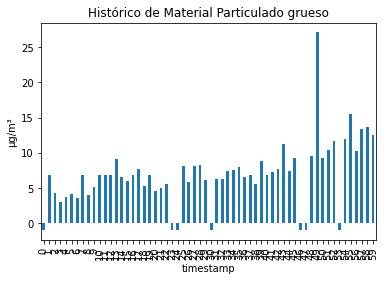

In [149]:
hist_pm10 = df['pm10'].plot(title='Histórico de Material Particulado grueso',kind='bar')
hist_pm10.set_xlabel("timestamp")
hist_pm10.set_ylabel("μg/m³")

- Diagrama histórico del Material Particulado fino (PM2.5)

Text(0, 0.5, 'μg/m³')

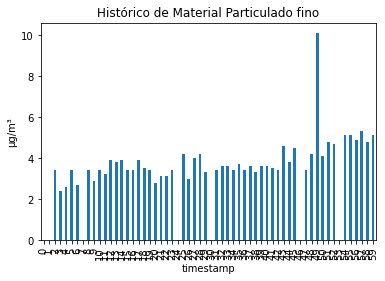

In [150]:
hist_pm25 = df['pm25'].plot(title='Histórico de Material Particulado fino',kind='bar')
hist_pm25.set_xlabel("timestamp")
hist_pm25.set_ylabel("μg/m³")

- Gráfico de puntos de la humedad relativa con respecto al tiempo, en el cual es posible ver la dispersión de los datos.

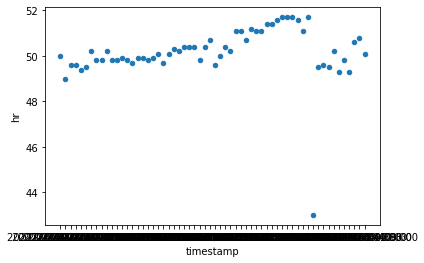

In [151]:
scat_humedadrelativa_cr_tiempo = df.plot("timestamp", "hr", kind="scatter")

- Gráfico de puntos de temperatura versus humedad relativa, donde para este caso se debería cumplir que a medida que la temperatura aumenta, el aire se vuelve mas seco, por lo tanto la humedad relativa disminuye.

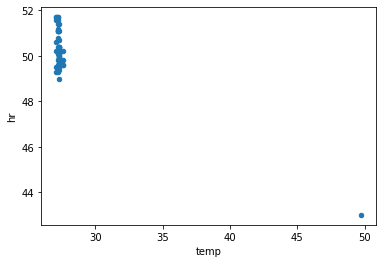

In [152]:
scat_temperatura_vs_humedadrelativa = df.plot("temp", "hr", kind="scatter")

## Guardar el dataset como ".csv"
Se guarda el set de datos con el nombre `"Datos_Procesados"` que tiene una extensión `".csv"` de esta manera se concluye la preparación de nuestros datos y los podríamos utilizar de manera optima en un posterior análisis de datos.

In [163]:
df.to_csv("./Datos_Procesados.csv", index=True)
print('Se guardó el DataFrame con los datos procesados en el archivo: "Datos_Procesados.csv"')

Se guardó el DataFrame con los datos procesados en el archivo: "Datos_Procesados.csv"
